In [2]:
import pandas as pd
import os, warnings, random, torch
warnings.filterwarnings('ignore')

from random import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(
    context='notebook', style='ticks', palette='bright',
    color_codes=True)  #other contexts: “paper”, “talk”, and “poster”,

# Plotting settings
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 30

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.serif": ["Arial"],
    "font.size": MEDIUM_SIZE,
    "axes.titlesize": MEDIUM_SIZE,
    "axes.labelsize": MEDIUM_SIZE,
    "figure.titlesize": MEDIUM_SIZE,
    "xtick.labelsize": SMALL_SIZE,
    "ytick.labelsize": SMALL_SIZE,
    "legend.fontsize": MEDIUM_SIZE,
})

markers = [".", "v", "H", "P", "s", "X", "D", 8, 10]
colorspal12 = [(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (0, 198, 248), (135, 133, 0), (0, 167, 108), (189, 189, 189)]
colorspal12 = [(x/256, y/256, z/256) for x, y, z in colorspal12]
colorspal6 = [(64, 83, 211), (221, 179, 16), (181, 29, 20), (0, 190, 255), (251, 73, 176), (0, 178, 93), (202, 202, 202)]
colorspal6 = [(x/256, y/256, z/256) for x, y, z in colorspal6]

In [ ]:
1

## General Spearman correlation

In [3]:
data_dir = "/data2/malbrank/protein_gym"
csv_folder = f"{data_dir}/substitutions/DMS_ProteinGym_substitutions/"
out_folder = f"{data_dir}/mut_effects/"
database_df = pd.read_csv(f"{data_dir}/substitutions/DMS_substitutions.csv")
test_names = [file[:-13] for file in os.listdir(f"{out_folder}/protmamba_long_finetuned_200")]
test_names = list(set(test_names))
database_df = database_df[database_df["DMS_id"].isin(test_names)]

results_df = pd.read_csv(f"{data_dir}/substitutions/DMS_substitutions_Spearman.csv", index_col=0)
results_df = results_df[results_df.index.isin(database_df["DMS_id"])]

results_df_auc = pd.read_csv(f"{data_dir}/substitutions/DMS_substitutions_AUC.csv", index_col=0)
results_df_auc = results_df_auc[results_df_auc.index.isin(database_df["DMS_id"])]

results_df_mcc = pd.read_csv(f"{data_dir}/substitutions/DMS_substitutions_MCC.csv", index_col=0)
results_df_mcc = results_df_mcc[results_df_mcc.index.isin(database_df["DMS_id"])]

results_df_toprecall = pd.read_csv(f"{data_dir}/substitutions/DMS_substitutions_Top_recall.csv", index_col=0)
results_df_toprecall = results_df_toprecall[results_df_toprecall.index.isin(database_df["DMS_id"])]

In [4]:
tests = [
 ("protmamba1_finetuned_msalength_200" , "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new runner"),
    ("protmamba_long_finetuned_wo_ensembling_msalength_200", "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba w/o retrieval"),
    ("protmamba_long_finetuned_wo_ensembling_msalength_200_with_retrievals_proteingym_0.5", "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba with retrieval"),
    ("_with_retrievals_proteingym_0.001",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.001)"),
    # 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, ]
    ("_with_retrievals_proteingym_0.01",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.01)"),
    ("_with_retrievals_proteingym_0.1",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.1)"),
    ("_with_retrievals_proteingym_0.2",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.2)"),
    ("_with_retrievals_proteingym_0.3",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.3)"),
    ("_with_retrievals_proteingym_0.4",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.4)"),
    ("_with_retrievals_proteingym_0.5",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.5)"),
    ("_with_retrievals_proteingym_0.6",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.6)"),
    ("_with_retrievals_proteingym_0.7",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.7)"),
    ("_with_retrievals_proteingym_0.8",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.8)"),
    ("_with_retrievals_proteingym_0.9",  "ckpmix_mamba_ft_retrieval", "/nvme1/common/mamba_100M_FIM_finetuned_32k_checkpoint-33750", None, 200, True, 0.98, 0.7, "ProtMamba new with retrieval (alpha = 0.9)"),
    
]

select_models = keep_models = ['ESM2 (150M)',
               'ESM-IF1',
               'MSA Transformer (single)',
               'Tranception L', 
                'TranceptEVE L',]
spearmanrs_tests = {}
test_results_df = pd.DataFrame(columns=["dms_id", "spearmanr", "auc", "mcc","toprecall", "uid",  "test_name", "model", "test_type", "msa_depth", "cat", "kingdom", "multiple_mutants", "seqlength", "msalength", "n_tokens",  "max_similarity", "max_dissimilarity", "shuffle", "num_mutants"])

for j, test in enumerate(tests):
    spear = torch.load(f"{out_folder}/{test[0]}/spearman.pt")
    auc = None
    if "auc.pt" in os.listdir(f"{out_folder}/{test[0]}/"):
        auc = torch.load(f"{out_folder}/{test[0]}/auc.pt")
    mcc = None
    if "mcc.pt" in os.listdir(f"{out_folder}/{test[0]}/"):
        mcc = torch.load(f"{out_folder}/{test[0]}/mcc.pt")
    toprecall = None
    if "top10percentrecall.pt" in os.listdir(f"{out_folder}/{test[0]}/"):
        toprecall = torch.load(f"{out_folder}/{test[0]}/top10percentrecall.pt")
    by_depth = None
    if "all_spearmanrs_by_depth.pt" in os.listdir(f"{out_folder}/{test[0]}/"):
        by_depth = torch.load(f"{out_folder}/{test[0]}/all_spearmanrs_by_depth.pt")
    for i, row in enumerate(database_df.iterrows()):
        try:
            msa_depth = row[1]["MSA_Neff_L_category"].lower()
        except:
            msa_depth = None
        cat = row[1]["coarse_selection_type"]
        kingdom = row[1]["taxon"]
        csv_file = row[1]["DMS_filename"]
        msa_start = int(row[1]["MSA_start"])
        dms_id = row[1]["DMS_id"]
        seq_len = row[1]["MSA_len"]
        uid = "_".join(dms_id.split("_")[:2])
        num_mutants = row[1]["DMS_number_multiple_mutants"]
        multiple_mutants = row[1]["includes_multiple_mutants"]
        ft_or_foundation = "finetuned" if "ft" in test[0] else "foundation"
        test_results_df = test_results_df.append({"dms_id": dms_id, 
                                                  "spearmanr": spear[dms_id] if dms_id in spear else None,  
                                                  "auc": auc[dms_id] if (auc is not None) and (dms_id in auc) else None,
                                                  "mcc": mcc[dms_id] if (mcc is not None) and (dms_id in mcc) else None,
                                                  "toprecall": toprecall[dms_id] if (toprecall is not None) and (dms_id in toprecall) else None,
                                                  "uid": uid, 
                                                  "test_name": test[-1], 
                                                    "model": ft_or_foundation,
                                                  "test_type": ("tokens" if test[3] is not None else "sequences"), 
                                                  "msa_depth": msa_depth, 
                                                  "cat": cat, 
                                                  "kingdom": kingdom, 
                                                  "multiple_mutants": multiple_mutants,
                                                  "msalength": test[4] if test[4] else test[3]//seq_len, 
                                                  "n_tokens": test[3] if test[3] else test[4]*seq_len, 
                                                  "seqlength": seq_len,
                                                  "max_similarity": test[6], 
                                                  "max_dissimilarity": test[7], 
                                                  "shuffle": test[5],
                                                "spearman_depth_1": by_depth[dms_id][0] if by_depth is not None else None,
                                                "spearman_depth_2": by_depth[dms_id][1] if by_depth is not None else None,
                                                "spearman_depth_3": by_depth[dms_id][2] if by_depth is not None else None,
                                                "spearman_depth_4": by_depth[dms_id][3] if by_depth is not None else None,
                                                "spearman_depth_5+": by_depth[dms_id][4] if by_depth is not None else None,
                                                  "num_mutants": num_mutants
                                                  }, ignore_index=True)
for model in select_models:
    spearmanrs_tests[model] = []
    for i, row in enumerate(database_df.iterrows()):
        dms_id = row[1]["DMS_id"]
        try:
            msa_depth = row[1]["MSA_Neff_L_category"].lower()
        except:
            msa_depth = None
        cat = row[1]["coarse_selection_type"]
        kingdom = row[1]["taxon"]
        num_mutants = row[1]["DMS_number_multiple_mutants"]
        multiple_mutants = row[1]["includes_multiple_mutants"]
        

        uid = "_".join(dms_id.split("_")[:2])
        spearman = results_df[model].loc[dms_id]
        auc = results_df_auc[model].loc[dms_id]
        mcc = results_df_mcc[model].loc[dms_id]
        toprecall = results_df_toprecall[model].loc[dms_id]
        test_results_df = test_results_df.append({"dms_id": dms_id, "spearmanr": spearman, "auc": auc, "mcc": mcc,"toprecall":toprecall,"uid":uid,  "test_name": model, "model": None, "test_type": "baseline", "msa_depth": msa_depth, "cat": cat, "kingdom": kingdom, "msalength": None, "seqlength": None,"n_tokens": None,  "max_similarity": None, "max_dissimilarity": None, "shuffle": None, "num_mutants": num_mutants, "multiple_mutants": multiple_mutants}, ignore_index=True)

In [23]:
test_results_df

,dms_id,spearmanr,auc,mcc,toprecall,uid,test_name,model,test_type,msa_depth,...,n_tokens,max_similarity,max_dissimilarity,shuffle,num_mutants,spearman_depth_1,spearman_depth_2,spearman_depth_3,spearman_depth_4,spearman_depth_5+
0,A0A140D2T1_ZIKV_Sourisseau_2019,0.396533,NaN,NaN,NaN,A0A140D2T1_ZIKV,ProtMamba new runner,foundation,sequences,medium,...,104800,0.98,0.7,True,0,None,None,None,None,None
1,A0A192B1T2_9HIV1_Haddox_2018,0.441058,NaN,NaN,NaN,A0A192B1T2_9HIV1,ProtMamba new runner,foundation,sequences,medium,...,170400,0.98,0.7,True,0,None,None,None,None,None
2,A0A1I9GEU1_NEIME_Kennouche_2019,0.010803,NaN,NaN,NaN,A0A1I9GEU1_NEIME,ProtMamba new runner,foundation,sequences,medium,...,32200,0.98,0.7,True,0,None,None,None,None,None
3,A0A247D711_LISMN_Stadelmann_2021,0.379510,NaN,NaN,NaN,A0A247D711_LISMN,ProtMamba new runner,foundation,sequences,high,...,17400,0.98,0.7,True,0,None,None,None,None,None
4,A0A2Z5U3Z0_9INFA_Doud_2016,0.490795,NaN,NaN,NaN,A0A2Z5U3Z0_9INFA,ProtMamba new runner,foundation,sequences,medium,...,113000,0.98,0.7,True,0,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4118,VKOR1_HUMAN_Chiasson_2020_activity,0.436000,0.758,0.371,0.157,VKOR1_HUMAN,TranceptEVE L,None,baseline,medium,...,None,NaN,NaN,None,0,None,None,None,None,None
4119,VRPI_BPT7_Tsuboyama_2023_2WNM,0.006000,0.490,-0.043,0.124,VRPI_BPT7,TranceptEVE L,None,baseline,medium,...,None,NaN,NaN,None,0,None,None,None,None,None
4120,YAIA_ECOLI_Tsuboyama_2023_2KVT,0.604000,0.806,0.485,0.339,YAIA_ECOLI,TranceptEVE L,None,baseline,medium,...,None,NaN,NaN,None,962,None,None,None,None,None
4121,YAP1_HUMAN_Araya_2012,0.439000,0.731,0.337,0.204,YAP1_HUMAN,TranceptEVE L,None,baseline,low,...,None,NaN,NaN,None,9713,None,None,None,None,None


In [7]:
x = test_results_df[test_results_df.test_name == "ProtMamba w/o retrieval"].sort_values("dms_id")
for k, v in zip(x.dms_id, x.spearmanr):
    print(k, v)

A0A140D2T1_ZIKV_Sourisseau_2019 0.39763985743923347
A0A192B1T2_9HIV1_Haddox_2018 0.43876403911710793
A0A1I9GEU1_NEIME_Kennouche_2019 0.020467864768187634
A0A247D711_LISMN_Stadelmann_2021 0.39184846356149283
A0A2Z5U3Z0_9INFA_Doud_2016 0.4946425269486289
A0A2Z5U3Z0_9INFA_Wu_2014 0.4510768465045498
A4D664_9INFA_Soh_2019 0.25037668391401774
A4GRB6_PSEAI_Chen_2020 0.5634171493001945
A4_HUMAN_Seuma_2022 0.41734472980530735
AACC1_PSEAI_Dandage_2018 0.4347587841771179
ACE2_HUMAN_Chan_2020 0.10291116738435753
ADRB2_HUMAN_Jones_2020 0.5031961918526218
AICDA_HUMAN_Gajula_2014_3cycles 0.234897955664014
AMFR_HUMAN_Tsuboyama_2023_4G3O 0.26412904529039377
AMIE_PSEAE_Wrenbeck_2017 0.5746012653425446
ANCSZ_Hobbs_2022 0.5010123239317255
ARGR_ECOLI_Tsuboyama_2023_1AOY 0.33012703907601354
B2L11_HUMAN_Dutta_2010_binding-Mcl-1 0.4386595630403903
BBC1_YEAST_Tsuboyama_2023_1TG0 0.3316997112583667
BCHB_CHLTE_Tsuboyama_2023_2KRU 0.5335825242555851
BLAT_ECOLX_Deng_2012 0.3811160492727226
BLAT_ECOLX_Firnberg_2014

In [10]:
# randomly extract 20 experiments for validation and the rest for testing
all_expe = list(test_results_df.dms_id.unique())
random.seed(42)
shuffle(all_expe)
val_names = all_expe[:20]
test_names = [x for x in all_expe if x not in val_names]
val_names

['HXK4_HUMAN_Gersing_2022_activity',
 'S22A1_HUMAN_Yee_2023_abundance',
 'CBS_HUMAN_Sun_2020',
 'PR40A_HUMAN_Tsuboyama_2023_1UZC',
 'SCN5A_HUMAN_Glazer_2019',
 'HSP82_YEAST_Mishra_2016',
 'CSN4_MOUSE_Tsuboyama_2023_1UFM',
 'CAR11_HUMAN_Meitlis_2020_gof',
 'SQSTM_MOUSE_Tsuboyama_2023_2RRU',
 'BLAT_ECOLX_Firnberg_2014',
 'NKX31_HUMAN_Tsuboyama_2023_2L9R',
 'GDIA_HUMAN_Silverstein_2021',
 'DLG4_HUMAN_Faure_2021',
 'POLG_PESV_Tsuboyama_2023_2MXD',
 'KCNE1_HUMAN_Muhammad_2023_function',
 'AMFR_HUMAN_Tsuboyama_2023_4G3O',
 'GAL4_YEAST_Kitzman_2015',
 'IF1_ECOLI_Kelsic_2016',
 'A0A2Z5U3Z0_9INFA_Wu_2014',
 'SBI_STAAM_Tsuboyama_2023_2JVG']

In [5]:
def balanced_mean(df, test_name=None, metric="spearmanr"):
    if test_name is None:
        return df.groupby(["test_name", "uid", "cat"]).mean().reset_index().groupby(["test_name", "cat"]).mean().groupby("test_name").mean().sort_values("spearmanr", ascending=False)
    else:
        df_ftr = df[df.test_name == test_name]
        return df_ftr.groupby(["uid", "cat"]).mean().reset_index().groupby(["cat"]).mean().mean()[metric]

In [7]:
balanced_mean(test_results_df)

,spearmanr,auc,mcc,toprecall,max_similarity,max_dissimilarity
test_name,,,,,,
TranceptEVE L,0.455925,0.750905,0.356209,0.230109,NaN,NaN
Tranception L,0.434311,0.739027,0.340828,0.220448,NaN,NaN
ProtMamba with retrieval,0.431690,NaN,NaN,NaN,0.98,0.7
ProtMamba new with retrieval (alpha = 0.5),0.431350,NaN,NaN,NaN,0.98,0.7
ESM-IF1,0.422377,0.729562,0.331155,0.222621,NaN,NaN
MSA Transformer (single),0.421345,0.731277,0.330460,0.216619,NaN,NaN
ProtMamba new with retrieval (alpha = 0.3),0.412132,NaN,NaN,NaN,0.98,0.7
ProtMamba new with retrieval (alpha = 0.2),0.410958,NaN,NaN,NaN,0.98,0.7
ProtMamba new with retrieval (alpha = 0.4),0.408866,NaN,NaN,NaN,0.98,0.7


In [24]:
test_results_df[test_results_df["test_name"] == "ProtMamba w/o retrieval"].set_index("dms_id").spearmanr - test_results_df[test_results_df["test_name"] == "ProtMamba new runner"].set_index("dms_id").spearmanr 

dms_id
A0A140D2T1_ZIKV_Sourisseau_2019       0.001107
A0A192B1T2_9HIV1_Haddox_2018         -0.002294
A0A1I9GEU1_NEIME_Kennouche_2019       0.009665
A0A247D711_LISMN_Stadelmann_2021      0.012339
A0A2Z5U3Z0_9INFA_Doud_2016            0.003848
                                        ...   
VKOR1_HUMAN_Chiasson_2020_activity    0.011869
VRPI_BPT7_Tsuboyama_2023_2WNM         0.020268
YAIA_ECOLI_Tsuboyama_2023_2KVT        0.000869
YAP1_HUMAN_Araya_2012                -0.050399
YNZC_BACSU_Tsuboyama_2023_2JVD        0.009016
Name: spearmanr, Length: 217, dtype: float64

In [ ]:
.spearmanr

In [11]:
test_results_df.groupby("uid").first().sort_values("seqlength")

,dms_id,spearmanr,auc,mcc,toprecall,test_name,model,test_type,msa_depth,cat,...,n_tokens,max_similarity,max_dissimilarity,shuffle,num_mutants,spearman_depth_1,spearman_depth_2,spearman_depth_3,spearman_depth_4,spearman_depth_5+
uid,,,,,,,,,,,,,,,,,,,,,
KCNH2_HUMAN,KCNH2_HUMAN_Kozek_2020,-0.086604,0.445400,0.0,0.050000,"ProtMamba, Foundation (8k)",foundation,tokens,medium,Activity,...,8000,0.98,0.7,True,0,0.342364,NaN,NaN,NaN,NaN
SCN5A_HUMAN,SCN5A_HUMAN_Glazer_2019,0.060892,0.526467,0.0,0.173913,"ProtMamba, Foundation (8k)",foundation,tokens,medium,OrganismalFitness,...,8000,0.98,0.7,True,0,0.106041,NaN,NaN,NaN,NaN
TCRG1_MOUSE,TCRG1_MOUSE_Tsuboyama_2023_1E0L,0.638907,0.882443,0.0,0.169811,"ProtMamba, Foundation (8k)",foundation,tokens,medium,Stability,...,8000,0.98,0.7,True,437,0.637561,0.556154,NaN,NaN,NaN
PIN1_HUMAN,PIN1_HUMAN_Tsuboyama_2023_1I6C,0.656384,0.842966,0.0,0.320988,"ProtMamba, Foundation (8k)",foundation,tokens,high,Stability,...,8000,0.98,0.7,True,116,0.637177,0.336329,NaN,NaN,NaN
YNZC_BACSU,YNZC_BACSU_Tsuboyama_2023_2JVD,0.526254,0.902447,0.0,0.356522,"ProtMamba, Foundation (8k)",foundation,tokens,medium,Stability,...,8000,0.98,0.7,True,1586,0.268912,0.042314,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SPIKE_SARS2,SPIKE_SARS2_Starr_2020_binding,0.148793,0.548492,0.0,0.125604,"ProtMamba, Foundation (8k)",foundation,tokens,medium,Binding,...,8000,0.98,0.7,True,0,0.047487,NaN,NaN,NaN,NaN
NPC1_HUMAN,NPC1_HUMAN_Erwood_2022_HEK293T,0.396701,0.711141,0.0,0.156250,"ProtMamba, Foundation (8k)",foundation,tokens,low,Activity,...,8000,0.98,0.7,True,0,0.396288,NaN,NaN,NaN,NaN
CAS9_STRP1,CAS9_STRP1_Spencer_2017_positive,0.066848,0.530707,0.0,0.093596,"ProtMamba, Foundation (8k)",foundation,tokens,medium,Activity,...,8000,0.98,0.7,True,0,0.135869,NaN,NaN,NaN,NaN


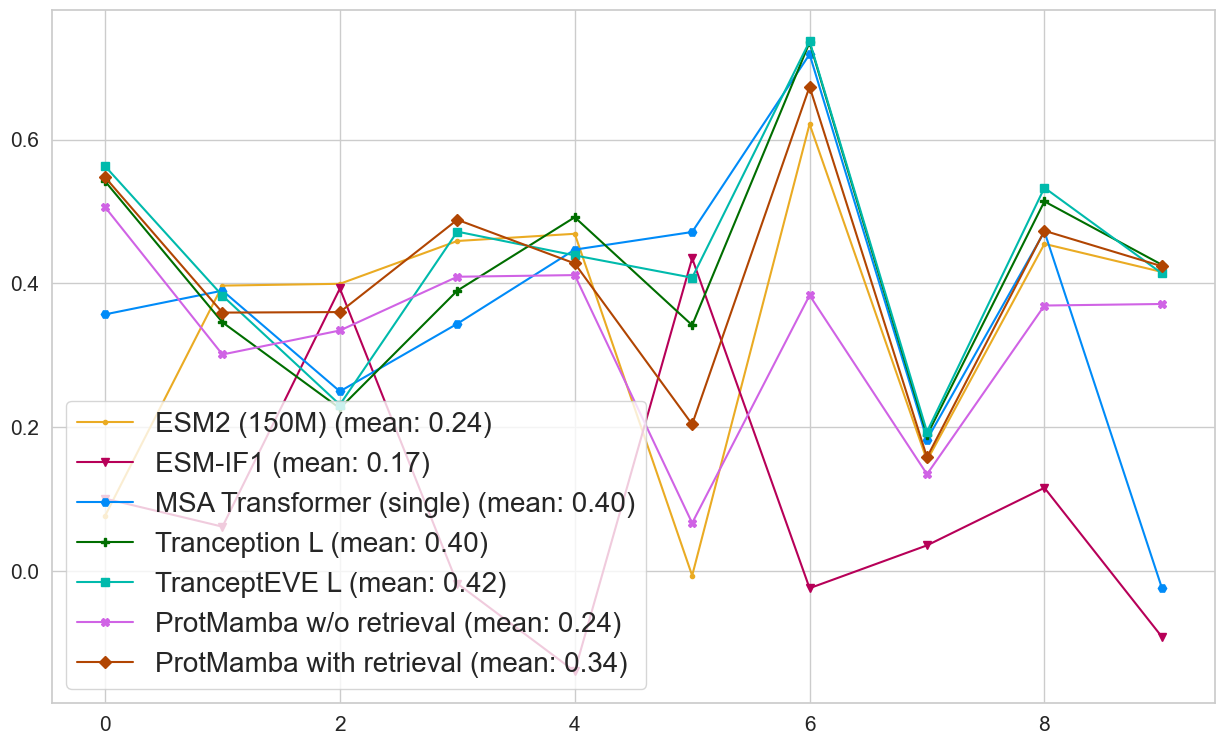

In [50]:
# compare the best models for the longest sequences
plt.figure(figsize=(15, 9))
for i, model in enumerate(keep_models+["ProtMamba w/o retrieval", "ProtMamba with retrieval"]):
    plt.plot([balanced_mean(test_results_df[test_results_df.uid == uid], model) for uid in longest], label=model+f" (mean: {balanced_mean(test_results_df[test_results_df.uid.isin(longest)], model):.2f})", marker=markers[i], color=colorspal12[i])
    
plt.legend()

In [37]:
test_results_df[test_results_df.uid == longest[7]].sort_values("spearmanr", ascending=False)

,dms_id,spearmanr,auc,mcc,toprecall,uid,test_name,model,test_type,msa_depth,...,n_tokens,max_similarity,max_dissimilarity,shuffle,num_mutants,spearman_depth_1,spearman_depth_2,spearman_depth_3,spearman_depth_4,spearman_depth_5+
8678,YAP1_HUMAN_Araya_2012,0.451000,0.734000,0.369,0.225000,YAP1_HUMAN,ESM2 (150M),None,baseline,low,...,None,NaN,NaN,None,9713,NaN,NaN,NaN,NaN,NaN
9546,YAP1_HUMAN_Araya_2012,0.439000,0.731000,0.337,0.204000,YAP1_HUMAN,TranceptEVE L,None,baseline,low,...,None,NaN,NaN,None,9713,NaN,NaN,NaN,NaN,NaN
6942,YAP1_HUMAN_Araya_2012,0.406275,NaN,None,NaN,YAP1_HUMAN,with retrieval (alpha = 0.8),foundation,sequences,low,...,100800,0.98,0.7,True,9713,NaN,NaN,NaN,NaN,NaN
7159,YAP1_HUMAN_Araya_2012,0.405871,NaN,None,NaN,YAP1_HUMAN,with retrieval (alpha = 0.9),foundation,sequences,low,...,100800,0.98,0.7,True,9713,NaN,NaN,NaN,NaN,NaN
6725,YAP1_HUMAN_Araya_2012,0.403936,NaN,None,NaN,YAP1_HUMAN,with retrieval (alpha = 0.7),foundation,sequences,low,...,100800,0.98,0.7,True,9713,NaN,NaN,NaN,NaN,NaN
7376,YAP1_HUMAN_Araya_2012,0.403640,NaN,None,NaN,YAP1_HUMAN,with retrieval (alpha = 1),foundation,sequences,low,...,100800,0.98,0.7,True,9713,NaN,NaN,NaN,NaN,NaN
6508,YAP1_HUMAN_Araya_2012,0.398775,NaN,None,NaN,YAP1_HUMAN,with retrieval (alpha = 0.6),foundation,sequences,low,...,100800,0.98,0.7,True,9713,NaN,NaN,NaN,NaN,NaN
7593,YAP1_HUMAN_Araya_2012,0.396538,NaN,None,NaN,YAP1_HUMAN,ProtMamba_TranceptEVE,foundation,sequences,low,...,100800,0.98,0.7,True,9713,NaN,NaN,NaN,NaN,NaN
432,YAP1_HUMAN_Araya_2012,0.390648,NaN,None,NaN,YAP1_HUMAN,ProtMamba with retrieval,foundation,sequences,low,...,100800,0.98,0.7,True,9713,0.545162,0.395602,NaN,NaN,NaN
6291,YAP1_HUMAN_Araya_2012,0.390648,NaN,None,NaN,YAP1_HUMAN,with retrieval (alpha = 0.5),foundation,sequences,low,...,100800,0.98,0.7,True,9713,0.545162,0.395602,NaN,NaN,NaN


In [22]:
balanced_mean( test_results_df[test_results_df.multiple_mutants == False], )

,spearmanr,auc,toprecall,max_similarity,max_dissimilarity,spearman_depth_1,spearman_depth_2,spearman_depth_3,spearman_depth_4,spearman_depth_5+
test_name,,,,,,,,,,
ProtMamba_TranceptEVE,0.428056,NaN,NaN,0.98,0.7,NaN,NaN,NaN,NaN,NaN
TranceptEVE L,0.425729,0.731107,0.205123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ESM-IF1,0.413123,0.724126,0.195183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
with retrieval (alpha = 0.4),0.406285,NaN,NaN,0.98,0.7,NaN,NaN,NaN,NaN,NaN
with retrieval (alpha = 0.5),0.405902,NaN,NaN,0.98,0.7,0.405902,NaN,NaN,NaN,NaN
Tranception L,0.404285,0.719900,0.197538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProtMamba with retrieval,0.403927,NaN,NaN,0.98,0.7,0.405902,NaN,NaN,NaN,NaN
with retrieval (alpha = 0.3),0.403896,NaN,NaN,0.98,0.7,NaN,NaN,NaN,NaN,NaN
with retrieval (alpha = 0.6),0.402807,NaN,NaN,0.98,0.7,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Spearman correlation')

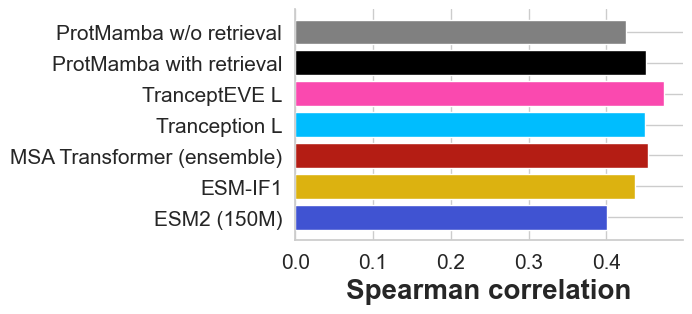

In [245]:
plt.figure(figsize=(5, 3))
for i, model in enumerate(keep_models):
    y = test_results_df[test_results_df["test_name"] == model].mean()["spearmanr"]
    plt.barh(i, y, color=colorspal6[i], label=model)
plt.barh(i+2, test_results_df[test_results_df["test_name"] == "ProtMamba w/o retrieval"].mean()["spearmanr"], color="gray", label="with retrieval (alpha = 0.5)")
plt.barh(i+1, test_results_df[test_results_df["test_name"] == "ProtMamba with retrieval"].mean()["spearmanr"], color="black", label="with retrieval (alpha = 0.5)")
plt.yticks(range(len(keep_models)+2), keep_models + ["ProtMamba with retrieval"]+["ProtMamba w/o retrieval"],)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Spearman correlation", fontweight='bold')

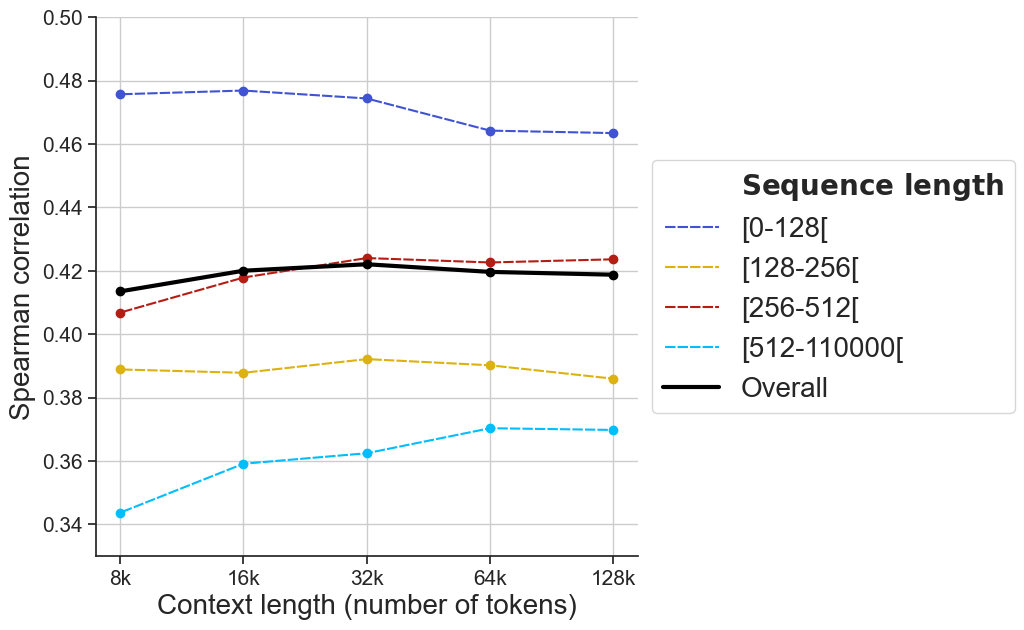

In [397]:
# We do the same but this time we breakdown by sequence length with multiple bins [0, 128] [128, 256] [256, 512] [512, 1024] [1024, 10000]
plt.figure(figsize=(7, 7))
bins = [0, 128, 256, 512, 110000]
contexts = ["8k", "16k", "32k", "64k", "128k"]
plt.plot([],[], label=r'$\mathrm{\bf{Sequence~length}}$',linestyle="None", color="None")

for i in range(len(bins) - 1):
    filter = (test_results_df["seqlength"] >= bins[i]) & (test_results_df["seqlength"] < bins[i+1]) # & (test_results_df["dms_id"].isin(val_names))
    plt.plot(range(len(contexts)), [test_results_df[(test_results_df["test_name"] == f"ProtMamba Long, Finetuned ({c})") & filter]["spearmanr"].mean() for c in contexts], linestyle=(5, (5, 1)), color=colorspal6[i], label=f"[{bins[i]}-{bins[i+1]}[")
    plt.scatter(range(len(contexts)), [test_results_df[(test_results_df["test_name"] == f"ProtMamba Long, Finetuned ({c})") & filter]["spearmanr"].mean() for c in contexts], color=colorspal6[i])
plt.plot(range(len(contexts)), [test_results_df[test_results_df["test_name"] == f"ProtMamba Long, Finetuned ({c})"]["spearmanr"].mean() for c in contexts], label = "Overall", color="black", linewidth=3)
plt.scatter(range(len(contexts)), [test_results_df[test_results_df["test_name"] == f"ProtMamba Long, Finetuned ({c})"]["spearmanr"].mean() for c in contexts], color="black")
plt.xticks(range(len(contexts)), contexts)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid()
plt.xlabel("Context length (number of tokens)")
plt.ylabel("Spearman correlation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/home/malbrank/Documents/ProtMamba/img/contextlength_vs_spearman_ntokens.svg", format="svg")
plt.savefig("/home/malbrank/Documents/ProtMamba/img/contextlength_vs_spearman_ntokens.pdf", format="pdf")
plt.ylim(0.33, 0.5)
plt.show()

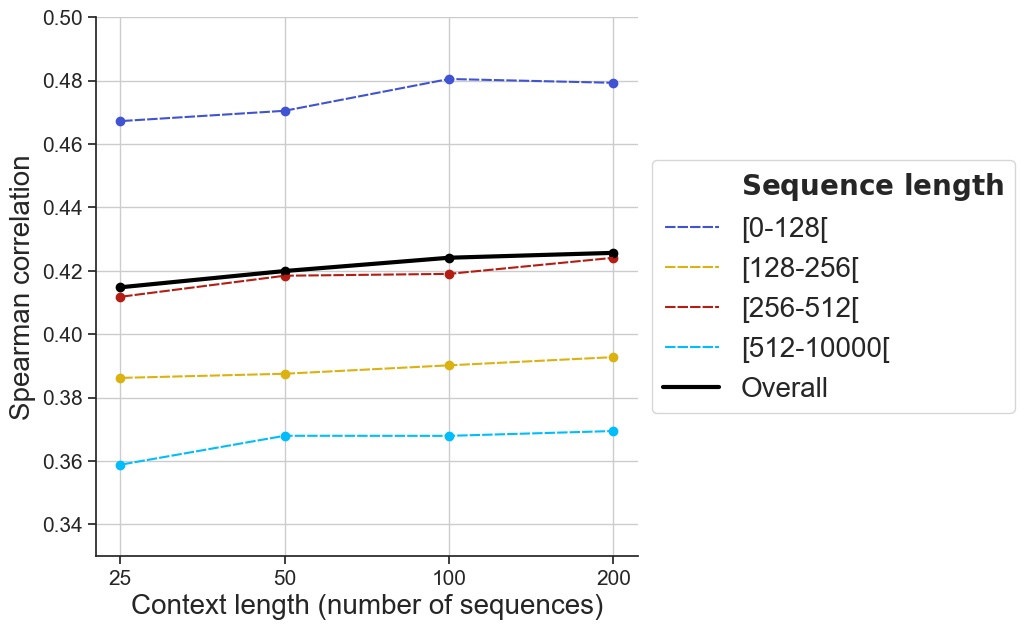

In [398]:
# We do the same but this time we breakdown by sequence length with multiple bins [0, 128] [128, 256] [256, 512] [512, 1024] [1024, 10000]
plt.figure(figsize=(7, 7))

bins = [0, 128, 256, 512, 10000]
contexts = ["25", "50", "100", "200"]
plt.plot([],[], label=r'$\mathrm{\bf{Sequence~length}}$',linestyle="None", color="None")

for i in range(len(bins) - 1):
    filter = (test_results_df["seqlength"] >= bins[i]) & (test_results_df["seqlength"] < bins[i+1]) #"& (test_results_df.dms_id.isin(val_names))
    plt.plot(range(len(contexts)), [test_results_df[(test_results_df["test_name"] == f"ProtMamba Long, Finetuned (MSA length: {c})") & filter]["spearmanr"].mean() for c in contexts], linestyle=(5, (5, 1)), color=colorspal6[i], label=f"[{bins[i]}-{bins[i+1]}[")
    plt.scatter(range(len(contexts)), [test_results_df[(test_results_df["test_name"] == f"ProtMamba Long, Finetuned (MSA length: {c})") & filter]["spearmanr"].mean() for c in contexts], color=colorspal6[i])
filter = (test_results_df.dms_id.isin(val_names))  | (test_results_df.dms_id.isin(test_names))
plt.plot(range(len(contexts)), [test_results_df[(test_results_df["test_name"] == f"ProtMamba Long, Finetuned (MSA length: {c})") & filter]["spearmanr"].mean() for c in contexts], label = "Overall", color="black", linewidth=3)
plt.scatter(range(len(contexts)), [test_results_df[(test_results_df["test_name"] == f"ProtMamba Long, Finetuned (MSA length: {c})") & filter]["spearmanr"].mean() for c in contexts], color="black")
plt.xticks(range(len(contexts)), contexts)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(0.33, 0.5)
# add vertical grid
plt.grid()
plt.xlabel("Context length (number of sequences)")
plt.ylabel("Spearman correlation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/home/malbrank/Documents/ProtMamba/img/contextlength_vs_spearman_nseqs.svg", format="svg")
plt.savefig("/home/malbrank/Documents/ProtMamba/img/contextlength_vs_spearman_nseqs.pdf", format="pdf")
plt.show()

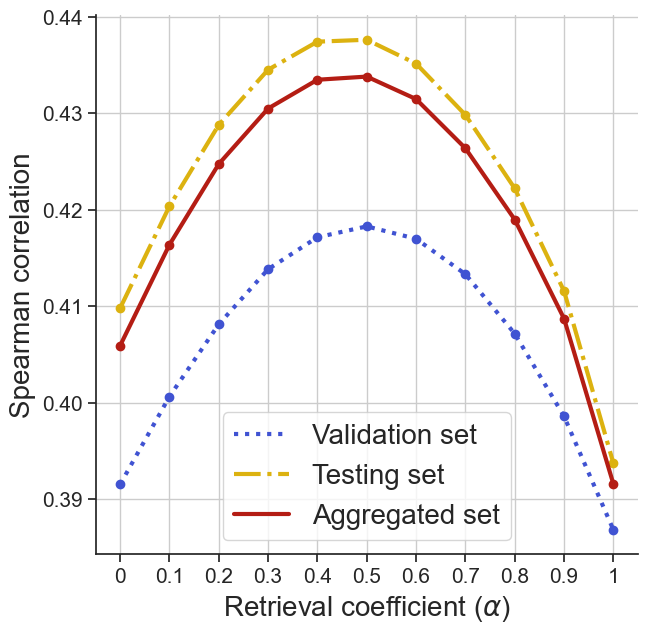

In [395]:
# We do the same but this time we breakdown by sequence length with multiple bins [0, 128] [128, 256] [256, 512] [512, 1024] [1024, 10000]
plt.figure(figsize=(7, 7))

bins = [0, 128, 256, 512, 10000]
contexts = ["25", "50", "100", "200"]

alphas = ["0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9", "1"]

filter = (test_results_df.dms_id.isin(val_names))
plt.plot(range(len(alphas)),
         [balanced_mean(test_results_df[filter], f"with retrieval (alpha = {alpha})") for alpha in alphas],
         label="Validation set", color=colorspal6[0], linewidth=3, linestyle=":")
plt.scatter(range(len(alphas)),
         [balanced_mean(test_results_df[filter], f"with retrieval (alpha = {alpha})") for alpha in alphas],
            color=colorspal6[0], )

filter = (test_results_df.dms_id.isin(test_names))
plt.plot(range(len(alphas)),
         [balanced_mean(test_results_df[filter], f"with retrieval (alpha = {alpha})") for alpha in alphas],
         label="Testing set", color=colorspal6[1], linewidth=3, linestyle="dashdot", )
plt.scatter(range(len(alphas)),
         [balanced_mean(test_results_df[filter], f"with retrieval (alpha = {alpha})") for alpha in alphas],
            color=colorspal6[1])

plt.plot(range(len(alphas)),
         [balanced_mean(test_results_df, f"with retrieval (alpha = {alpha})") for alpha in alphas],
         label="Aggregated set", color=colorspal6[2], linewidth=3, )
plt.scatter(range(len(alphas)),
         [balanced_mean(test_results_df, f"with retrieval (alpha = {alpha})") for alpha in alphas],
            color=colorspal6[2])

plt.xticks(range(len(alphas)), alphas)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.ylim(0.35, 0.49)
# add vertical grid
plt.grid()
plt.xlabel(r"Retrieval coefficient ($\alpha$)")
plt.ylabel("Spearman correlation")
plt.legend()
plt.savefig("/home/malbrank/Documents/ProtMamba/img/retrieval_coefficient_validation.svg", format="svg")
plt.savefig("/home/malbrank/Documents/ProtMamba/img/retrieval_coefficient_validation.pdf", format="pdf")
plt.show()


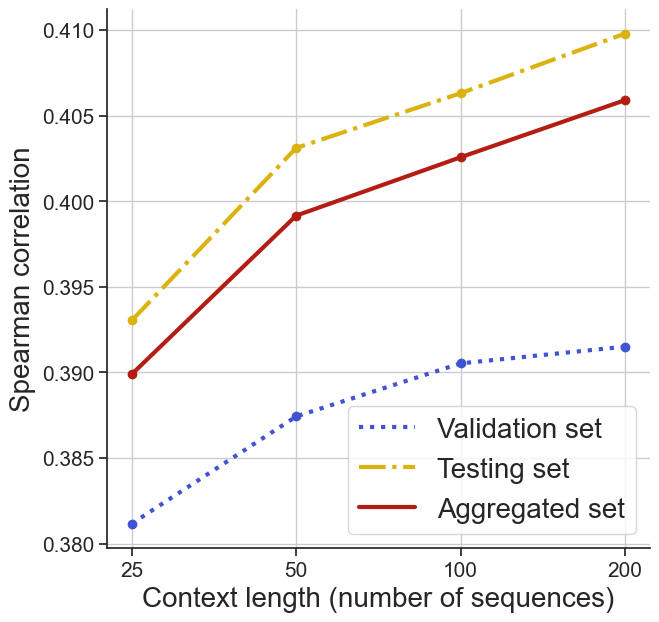

In [394]:
# We do the same but this time we breakdown by sequence length with multiple bins [0, 128] [128, 256] [256, 512] [512, 1024] [1024, 10000]
plt.figure(figsize=(7, 7))

bins = [0, 128, 256, 512, 10000]
contexts = ["25", "50", "100", "200"]

filter = (test_results_df.dms_id.isin(val_names))  
plt.plot(range(len(contexts)), [balanced_mean(test_results_df[filter], f"ProtMamba Long, Finetuned (MSA length: {c})") for c in contexts], label = "Validation set", color=colorspal6[0], linewidth=3, linestyle=":")
plt.scatter(range(len(contexts)), [balanced_mean(test_results_df[filter], f"ProtMamba Long, Finetuned (MSA length: {c})") for c in contexts], color=colorspal6[0],)


filter = (test_results_df.dms_id.isin(test_names))  
plt.plot(range(len(contexts)), [balanced_mean(test_results_df[filter], f"ProtMamba Long, Finetuned (MSA length: {c})") for c in contexts], label = "Testing set", color=colorspal6[1], linewidth=3, linestyle="dashdot",)
plt.scatter(range(len(contexts)), [balanced_mean(test_results_df[filter], f"ProtMamba Long, Finetuned (MSA length: {c})") for c in contexts], color=colorspal6[1])

plt.plot(range(len(contexts)), [balanced_mean(test_results_df, f"ProtMamba Long, Finetuned (MSA length: {c})") for c in contexts], label = "Aggregated set", color=colorspal6[2], linewidth=3,)
plt.scatter(range(len(contexts)), [balanced_mean(test_results_df, f"ProtMamba Long, Finetuned (MSA length: {c})") for c in contexts], color=colorspal6[2])


plt.xticks(range(len(contexts)), contexts)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.ylim(0.35, 0.49)
# add vertical grid
plt.grid()
plt.xlabel("Context length (number of sequences)")
plt.ylabel("Spearman correlation")
plt.legend()
plt.savefig("/home/malbrank/Documents/ProtMamba/img/contextlength_validation.svg", format="svg")
plt.savefig("/home/malbrank/Documents/ProtMamba/img/contextlength_validation.pdf", format="pdf")
plt.show()

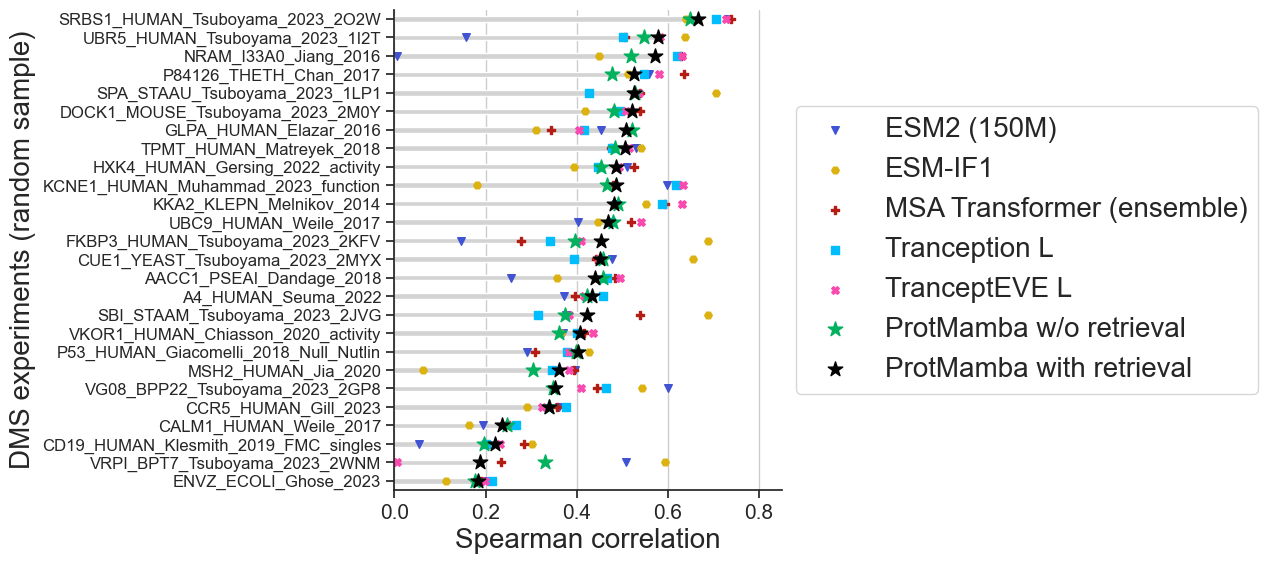

In [401]:
n = 26
dms_ids = random.sample(list(test_results_df["dms_id"].unique()), n)
plt.figure(figsize=(5, 6/25*n))
key = "ProtMamba with retrieval"
samples = test_results_df[test_results_df["dms_id"].isin(dms_ids) & (test_results_df["test_name"] == key)].sort_values("spearmanr", ascending=True).set_index("dms_id")
# plot 
plt.barh(samples.index, samples["spearmanr"]+0.5, color = "lightgray", left = -0.5, height = 0.3)
for i, model in enumerate(keep_models):
    x = test_results_df[test_results_df["dms_id"].isin(dms_ids) & (test_results_df["test_name"] == model)].set_index("dms_id")
    plt.scatter(x["spearmanr"], x.index, label=model, color=colorspal6[i], marker=markers[i+1], s=30)
key = "ProtMamba w/o retrieval"
samples = test_results_df[test_results_df["dms_id"].isin(dms_ids) & (test_results_df["test_name"] == key)].sort_values("spearmanr", ascending=True).set_index("dms_id")
plt.scatter(samples["spearmanr"],samples.index, label=key, color = colorspal6[-2], marker="*", s=120)
key = "ProtMamba with retrieval"
samples = test_results_df[test_results_df["dms_id"].isin(dms_ids) & (test_results_df["test_name"] == key)].sort_values("spearmanr", ascending=True).set_index("dms_id")
plt.scatter(samples["spearmanr"],samples.index, label=key, color = "black", marker="*", s=120)

#reduce the size of the yticks
plt.yticks(fontsize=12)
plt.ylim(-0.5,n-0.5)
plt.xlim(0,0.85)
# hide box around plot on right and top
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# add vertical grid
plt.grid(axis='x')
plt.xlabel("Spearman correlation",)
plt.ylabel("DMS experiments (random sample)")

# outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# save in svg 
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_proteingym.svg", bbox_inches='tight')
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_proteingym.pdf", bbox_inches='tight')

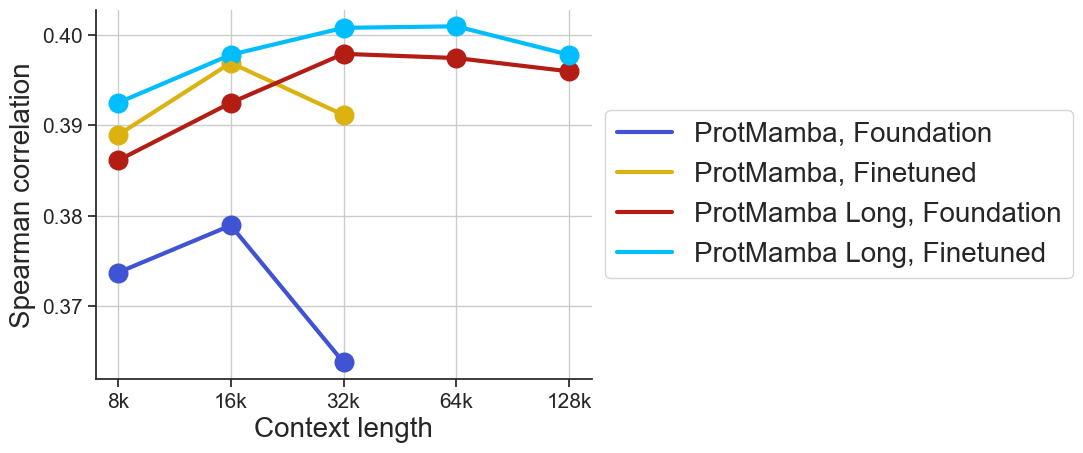

In [407]:
# We do the same but this time we breakdown by sequence length with multiple bins [0, 128] [128, 256] [256, 512] [512, 1024] [1024, 10000]
contexts = ["8k", "16k", "32k", "64k", "128k"]
model_mamba = ["ProtMamba, Foundation", "ProtMamba, Finetuned", "ProtMamba Long, Foundation", "ProtMamba Long, Finetuned"]
for i, x in enumerate(model_mamba):
    plt.plot(range(len(contexts)),
             [balanced_mean(test_results_df, f"{x} ({c})") for c in contexts], color=colorspal6[i], label=x, linewidth=3)
    plt.scatter(range(len(contexts)),
                [balanced_mean(test_results_df, f"{x} ({c})") for c in contexts], color=colorspal6[i], s=180)
plt.xticks(range(len(contexts)), contexts)

plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Context length")
plt.ylabel("Spearman correlation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_vs_contextlength.svg", bbox_inches='tight')
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_vs_contextlength.pdf", bbox_inches='tight')
plt.show()

In [14]:
# We do the same but this time we breakdown by sequence length with multiple bins [0, 128] [128, 256] [256, 512] [512, 1024] [1024, 10000]
contexts = ["8k", "16k", "32k", "64k", "128k"]
model_mamba = ["ProtMamba, Foundation", "ProtMamba, Finetuned", "ProtMamba Long, Foundation", "ProtMamba Long, Finetuned"]
for i, x in enumerate(model_mamba):
    plt.plot(range(len(contexts)),
             [balanced_mean(test_results_df, f"{x} ({c})") for c in contexts], color=colorspal6[i], label=x, linewidth=3)
    plt.scatter(range(len(contexts)),
                [balanced_mean(test_results_df, f"{x} ({c})") for c in contexts], color=colorspal6[i], s=180)
plt.xticks(range(len(contexts)), contexts)

plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Context length")
plt.ylabel("Spearman correlation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_vs_contextlength.svg", bbox_inches='tight')
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_vs_contextlength.pdf", bbox_inches='tight')
plt.show()

NameError: name 'balanced_mean' is not defined

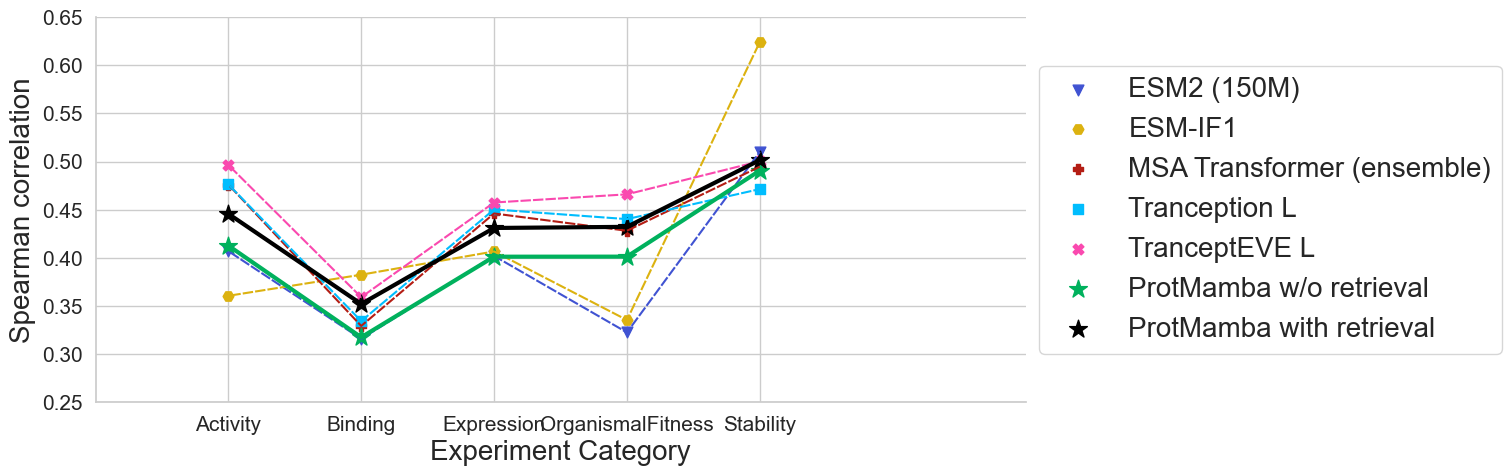

In [380]:

xticks = None

#Make it an histogram. category: test_name, value: spearmanr, group: msa_depth
plt.figure(figsize=(12, 5))
plt.grid()

for i, model in enumerate(keep_models):
    y = test_results_df[test_results_df["test_name"] == model].groupby(["cat"]).mean()["spearmanr"]
    plt.plot(range(1,len(y)+1), y.values, linestyle=(5, (5, 1)), color=colorspal6[i],)
    plt.scatter(range(1,len(y)+1), y.values, color=colorspal6[i], marker=markers[i+1], s=60, label=model,)
    xticks = list(y.index)

key = "ProtMamba w/o retrieval"
y = test_results_df[test_results_df["test_name"] == key].groupby(["cat"]).mean()["spearmanr"]
plt.plot(range(1,len(y)+1), y.values, color=colorspal6[-2], linewidth=3)
plt.scatter(range(1,len(y)+1), y.values, color=colorspal6[-2],  marker="*", s=180, label=key)


key = "ProtMamba with retrieval"
y = test_results_df[test_results_df["test_name"] == key].groupby(["cat"]).mean()["spearmanr"]
plt.plot(range(1,len(y)+1), y.values, color="black", linewidth=3)
plt.scatter(range(1,len(y)+1), y.values, color="black", marker="*", s=180, label=key)


xticks = list(y.index)

#legend on the side
plt.xticks(range(1,len(xticks)+1), xticks, rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("Experiment Category")
plt.ylabel("Spearman correlation")
plt.xlim(0, 7)
plt.ylim(0.25, 0.65)
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_per_category.svg", bbox_inches='tight')
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_per_category.pdf", bbox_inches='tight')

plt.show()


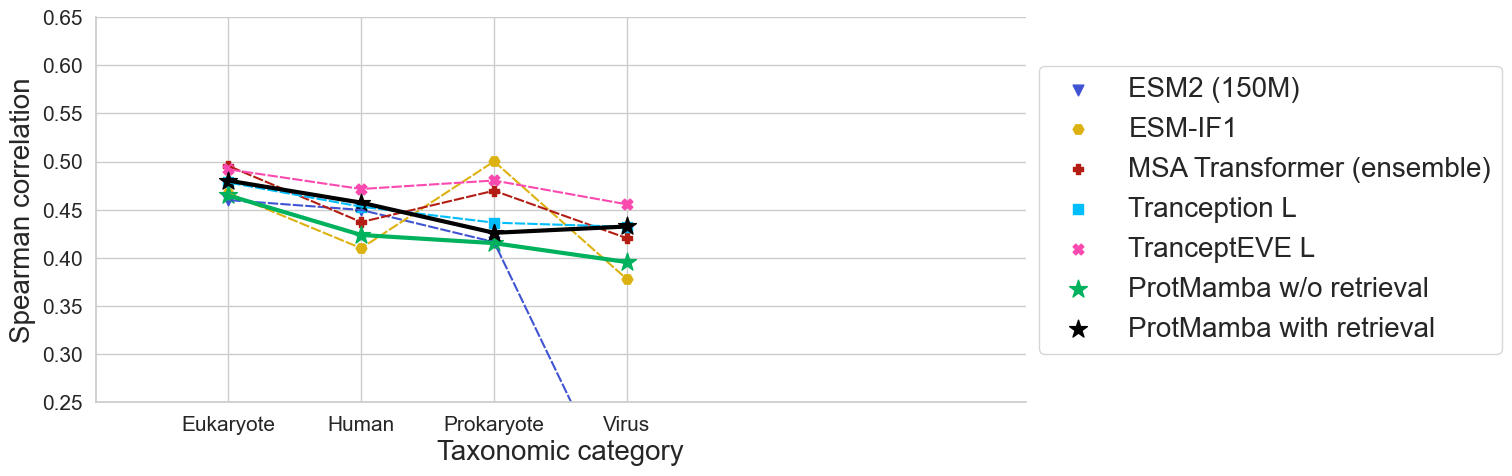

In [382]:
#Make it an histogram. category: test_name, value: spearmanr, group: msa_depth
plt.figure(figsize=(12, 5))
plt.grid()

for i, model in enumerate(keep_models):
    y = test_results_df[test_results_df["test_name"] == model].groupby(["kingdom"]).mean()["spearmanr"]
    plt.plot(range(len(y)), y.values, linestyle=(5, (5, 1)), color=colorspal6[i])
    plt.scatter(range(len(y)), y.values, color=colorspal6[i], label=model, marker=markers[i+1], s=60)
    xticks = list(y.index)

key = "ProtMamba w/o retrieval"
y = test_results_df[test_results_df["test_name"] == key].groupby(["kingdom"]).mean()["spearmanr"]
plt.plot(y.values,  color=colorspal6[-2], linewidth=3)
plt.scatter(range(len(y)), y.values, color=colorspal6[-2], label=key, marker="*", s=180)

key = "ProtMamba with retrieval"
y = test_results_df[test_results_df["test_name"] == key].groupby(["kingdom"]).mean()["spearmanr"]
plt.plot(y.values,  color="black", linewidth=3)
plt.scatter(range(len(y)), y.values, color="black",label=key, marker="*", s=180)
xticks = list(y.index)

#legend on the side
plt.xticks(range(len(xticks)), xticks, rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid()
plt.xlabel("Taxonomic category")
plt.ylabel("Spearman correlation")
plt.xlim(-1, 6)
plt.ylim(0.25, 0.65)
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_per_kingdom.svg", bbox_inches='tight')
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_per_kingdom.pdf", bbox_inches='tight')

plt.show()

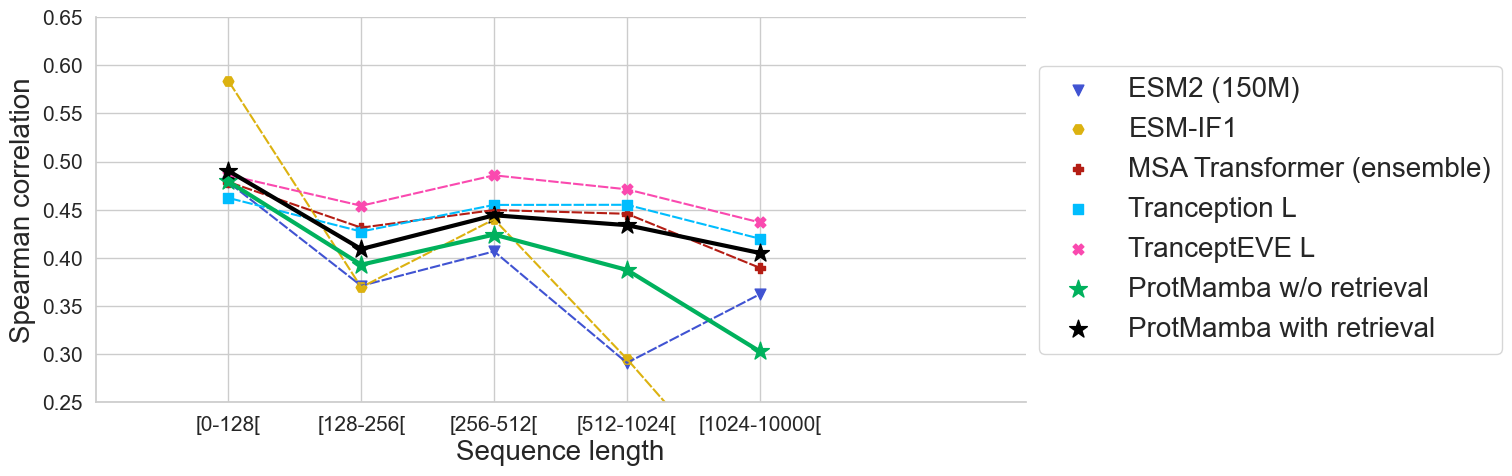

In [381]:
bins = [0, 128, 256, 512, 1024, 10000]
#key = "ProtMamba Long (8k to 64k)"
dms_id_bins = [list(test_results_df[(test_results_df["test_name"] == key) & (test_results_df["seqlength"] < y)& (test_results_df["seqlength"] >= x)].dms_id) for x,y in zip(bins[:-1], bins[1:])]
keys = ["ProtMamba w/o retrieval", "ProtMamba with retrieval"]
color_keys = [ colorspal6[-2], "black"]
plt.figure(figsize=(12, 5))

for i, model in enumerate(keep_models):
    plt.plot(range(len(bins)-1),
             [test_results_df[(test_results_df["test_name"] == model) & (test_results_df["dms_id"].isin(dms_bin))]["spearmanr"].mean()
              for dms_bin in dms_id_bins], linestyle=(5, (5, 1)), color=colorspal6[i])
    plt.scatter(range(len(bins)-1), [test_results_df[(test_results_df["test_name"] == model) & (test_results_df["dms_id"].isin(dms_bin))]["spearmanr"].mean()
              for dms_bin in dms_id_bins], color=colorspal6[i], marker=markers[i+1], s=60, label=model)
plt.xticks(range(len(bins)-1), [f"[{x}-{y}[" for x,y in zip(bins[:-1], bins[1:])])
for key, col in zip(keys, color_keys):
    plt.plot(range(len(bins)-1),[test_results_df[(test_results_df["test_name"] == key) & (test_results_df["dms_id"].isin(dms_bin))]["spearmanr"].mean()
                  for dms_bin in dms_id_bins], linewidth=3, color=col)
    plt.scatter(range(len(bins)-1),
                 [test_results_df[(test_results_df["test_name"] == key) & (test_results_df["seqlength"] < y)& (test_results_df["seqlength"] >= x)]["spearmanr"].mean()
                  for x,y in  zip(bins[:-1], bins[1:])], marker="*", s=180, label=key, color=col)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# add vertical grid
plt.xlabel("Sequence length")
plt.ylabel("Spearman correlation")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlim(-1, 6)
plt.ylim(0.25, 0.65)

plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_per_seqlength.svg", bbox_inches='tight')
plt.savefig("/home/malbrank/Documents/ProtMamba/img/spearman_correlation_per_seqlength.pdf", bbox_inches='tight')
plt.show()

In [15]:
# do it
model_names = select_models + ["ProtMamba with retrieval", "ProtMamba w/o retrieval"]

avg_spearmanr = [balanced_mean(test_results_df, model) for model in model_names]
avg_spearmanr_high = [test_results_df[(test_results_df["msa_depth"] == "high") & (test_results_df["test_name"] == model)].groupby(["uid"]).mean().mean()["spearmanr"] for model in model_names]
avg_spearmanr_medium = [test_results_df[(test_results_df["msa_depth"] == "medium") & (test_results_df["test_name"] == model)].groupby(["uid"]).mean().mean()["spearmanr"]  for model in model_names]
avg_spearmanr_low = [test_results_df[(test_results_df["msa_depth"] == "low") & (test_results_df["test_name"] == model)].groupby(["uid"]).mean().mean()["spearmanr"]  for model in model_names]
avg_spearmanr_human = [balanced_mean(test_results_df[(test_results_df["kingdom"] == "Human")], model) for model in model_names]
avg_spearmanr_viral = [balanced_mean(test_results_df[(test_results_df["kingdom"] == "Virus")], model) for model in model_names]
avg_spearmanr_bacterial = [balanced_mean(test_results_df[(test_results_df["kingdom"] == "Prokaryote")], model) for model in model_names]
avg_spearmanr_euka = [balanced_mean(test_results_df[(test_results_df["kingdom"] == "Eukaryote")], model) for model in model_names]
avg_spearmanr_OrganismalFitness = [balanced_mean(test_results_df[(test_results_df["cat"] == "OrganismalFitness")], model) for model in model_names]
avg_spearmanr_Activity =[balanced_mean(test_results_df[(test_results_df["cat"] == "Activity")], model) for model in model_names]
avg_spearmanr_Stability = [balanced_mean(test_results_df[(test_results_df["cat"] == "Stability")], model) for model in model_names]
avg_spearmanr_Binding = [balanced_mean(test_results_df[(test_results_df["cat"] == "Binding")], model) for model in model_names]
avg_spearmanr_Expression = [balanced_mean(test_results_df[(test_results_df["cat"] == "Expression")], model) for model in model_names]
# per category also:
['OrganismalFitness', 'Activity', 'Stability', 'Binding', 'Expression']

['OrganismalFitness', 'Activity', 'Stability', 'Binding', 'Expression']

In [435]:
# Initialize the LaTeX table
table_latex = "\\begin{table}[H]\n\\centering\n"
table_latex += "\\begin{tabular}{|c|c|c|ccc|cccc|}\n"
table_latex += "\\hline\n"
# Add grouped headers
table_latex += "& & & \\multicolumn{3}{c|}{MSA depth} & \\multicolumn{4}{c|}{Kingdom}\\\\\n"
table_latex += "Model & Parameters & Spearmanr & High & Medium & Low & Human & Virus & Prokaryotes & Eukaryotes \\\\\n"
table_latex += "\\hline\n"

types = ["Alignment", "Alignment", "pLM", "Inv. Folding", "Alignment & pLM", "Alignment & pLM", "Alignment & pLM", "Family pLM", "Family pLM"]
# Add each model's data to the table
for i, model in enumerate(model_names):
    table_latex += f"{model} & 0M & {avg_spearmanr[i]:.3f} & {avg_spearmanr_high[i]:.3f} & {avg_spearmanr_medium[i]:.3f} & {avg_spearmanr_low[i]:.3f}  \\\\\n"

# Close the LaTeX table
table_latex += "\\hline\n\\end{tabular}\n\\end{table}"

print(table_latex)

\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|ccc|cccc|}
\hline
& & & \multicolumn{3}{c|}{MSA depth} & \multicolumn{4}{c|}{Kingdom}\\
Model & Parameters & Spearmanr & High & Medium & Low & Human & Virus & Prokaryotes & Eukaryotes \\
\hline
ESM2 (150M) & 0M & 0.387 & 0.497 & 0.358 & 0.306  \\
ESM-IF1 & 0M & 0.422 & 0.544 & 0.431 & 0.300  \\
MSA Transformer (ensemble) & 0M & 0.434 & 0.488 & 0.450 & 0.404  \\
Tranception L & 0M & 0.434 & 0.473 & 0.438 & 0.432  \\
TranceptEVE L & 0M & 0.456 & 0.492 & 0.467 & 0.451  \\
ProtMamba with retrieval & 0M & 0.434 & 0.472 & 0.439 & 0.450  \\
ProtMamba w/o retrieval & 0M & 0.406 & 0.468 & 0.412 & 0.395  \\
\hline
\end{tabular}
\end{table}


In [16]:
# Initialize the LaTeX table
table_latex = r"""\begin{tabular}{|ccc|ccc|}
\hline
& & & \multicolumn{3}{c|}{\textbf{MSA depth}}\\
\textbf{Model} & \textbf{Params.} & \textbf{Avg} & \textbf{High} & \textbf{Medium} & \textbf{Low}\\
\hline
"""

# Add each model's data to the table
for i, model in enumerate(model_names):
    table_latex += f"{model} & 0M & {avg_spearmanr[i]:.4f} & {avg_spearmanr_high[i]:.4f} & {avg_spearmanr_medium[i]:.4f} & {avg_spearmanr_low[i]:.4f}  \\\\\n"

# Close the LaTeX table
table_latex += "\\hline\n\\end{tabular}\n\\end{table}"

print(table_latex)

\begin{tabular}{|ccc|ccc|}
\hline
& & & \multicolumn{3}{c|}{\textbf{MSA depth}}\\
\textbf{Model} & \textbf{Params.} & \textbf{Avg} & \textbf{High} & \textbf{Medium} & \textbf{Low}\\
\hline
ESM2 (150M) & 0M & 0.3869 & 0.4971 & 0.3585 & 0.3064  \\
ESM-IF1 & 0M & 0.4224 & 0.5441 & 0.4311 & 0.2998  \\
MSA Transformer (single) & 0M & 0.4213 & 0.4726 & 0.4349 & 0.3932  \\
Tranception L & 0M & 0.4343 & 0.4734 & 0.4378 & 0.4322  \\
TranceptEVE L & 0M & 0.4559 & 0.4915 & 0.4673 & 0.4512  \\
ProtMamba with retrieval & 0M & 0.4326 & 0.4715 & 0.4378 & 0.4477  \\
ProtMamba w/o retrieval & 0M & 0.4034 & 0.4654 & 0.4110 & 0.3909  \\
\hline
\end{tabular}
\end{table}


In [21]:
# Initialize the LaTeX table
table_latex = "\\begin{table}[H]\n\\centering\n"
table_latex += "\\begin{tabular}{|ccc|ccccc|}\n"
table_latex += "\\hline\n"
# Add grouped headers
table_latex += "& & & \\multicolumn{5}{c|}{Category} \\\\\n"
table_latex += "Model & Parameters & Spearmanr &  OrganismalFitness & Activity & Stability & Binding & Expression \\\\\n"
table_latex += "\\hline\n"

# Add each model's data to the table
for i, model in enumerate(model_names):
    table_latex += f"{model} & 0M & {avg_spearmanr[i]:.2f} & {avg_spearmanr_OrganismalFitness[i]:.2f} & {avg_spearmanr_Activity[i]:.2f} & {avg_spearmanr_Stability[i]:.2f} & {avg_spearmanr_Binding[i]:.2f} & {avg_spearmanr_Expression[i]:.2f} \\\\\n"

# Close the LaTeX table
table_latex += "\\hline\n\\end{tabular}\n\\end{table}"

print(table_latex)


\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|}
\hline
& & & \multicolumn{5}{c|}{Category} \\
Model & Parameters & Spearmanr &  OrganismalFitness & Activity & Stability & Binding & Expression \\
\hline
Site-Independent & 0M & 0.37 & 0.39 & 0.38 & 0.36 & 0.32 & 0.34 \\
EVmutation & 0M & 0.42 & 0.42 & 0.45 & 0.43 & 0.30 & 0.38 \\
ESM2 (150M) & 0M & 0.40 & 0.32 & 0.41 & 0.51 & 0.32 & 0.40 \\
ESM-IF1 & 0M & 0.44 & 0.34 & 0.36 & 0.62 & 0.38 & 0.41 \\
Tranception L & 0M & 0.45 & 0.44 & 0.48 & 0.47 & 0.33 & 0.45 \\
TranceptEVE S & 0M & nan & nan & nan & nan & nan & nan \\
MSA Transformer (single) & 0M & 0.44 & 0.42 & 0.46 & 0.48 & 0.32 & 0.44 \\
ProtMamba Long (MSA length: 200) & 0M & 0.42 & 0.40 & 0.42 & 0.48 & 0.31 & 0.40 \\
ProtMamba Long (50 to 400) & 0M & 0.42 & 0.40 & 0.42 & 0.49 & 0.30 & 0.40 \\
\hline
\end{tabular}
\end{table}


\begin{table}[H]
\centering
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
& & & \multicolumn{3}{c|}{MSA depth} & \multicolumn{4}{c|}{Kingdom} & \multicolumn{5}{c|}{Category} \\
Model & Parameters & Spearmanr & High & Medium & Low & Human & Virus & Prokaryotes & Eukaryotes & OrganismalFitness & Activity & Stability & Binding & Expression \\
\hline
TranceptEVE S & 0M & 0.47 & 0.49 & 0.46 & 0.46 & 0.47 & 0.44 & 0.47 & 0.49 & 0.46 & 0.48 & 0.50 & 0.38 & 0.44 \\
ESM-IF1 & 0M & 0.44 & 0.54 & 0.42 & 0.31 & 0.41 & 0.38 & 0.50 & 0.47 & 0.34 & 0.36 & 0.62 & 0.38 & 0.41 \\
ESM2 (150M) & 0M & 0.40 & 0.50 & 0.36 & 0.33 & 0.45 & 0.13 & 0.42 & 0.46 & 0.32 & 0.41 & 0.51 & 0.32 & 0.40 \\
MSA Transformer (single) & 0M & 0.44 & 0.48 & 0.43 & 0.40 & 0.43 & 0.39 & 0.46 & 0.48 & 0.42 & 0.46 & 0.48 & 0.32 & 0.44 \\
EVmutation & 0M & 0.42 & 0.42 & 0.42 & 0.41 & 0.41 & 0.39 & 0.43 & 0.43 & 0.42 & 0.45 & 0.43 & 0.30 & 0.38 \\
Site-Independent & 0M & 0.37 & 0.33 & 0.37 & 0.44 & 0.39 & 0.38 & 0.32 & 0.38 & 0.39 & 0.38 & 0.36 & 0.32 & 0.34 \\
ProtMamba Long (25 to 400) & 0M & 0.42 & 0.46 & 0.41 & 0.40 & 0.42 & 0.39 & 0.42 & 0.47 & 0.40 & 0.42 & 0.49 & 0.30 & 0.40 \\
\hline
\end{tabular}
\end{table}